# Lecture 3 Workbook
## Effects and confidence intervals
This is a workbook that contains the python code that was used in slides
appearing in the lecture. It is provided so that you can see for yourself
how this code works.

## Definitions and setup
Code here is just for making everything look sort of *uniform*

In [144]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma, norm, t
import pandas as pd

In [145]:
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 10

This is the seed for the random number generator. Graphs for the course will be generated with seed 367 (for BME). You can change it or use 'shuffle' to get different pseudo-random numbers each time.

In [146]:
np.random.seed(367)

## Load data
Load data on cerebellar volumes

In [147]:
d = pd.read_csv('cerebellar_volumes.csv')


## Look at two separate groups by age

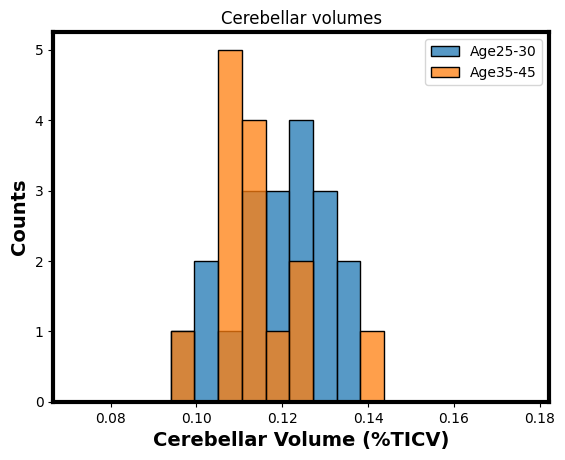

Mean of young: 0.119
Mean of old: 0.114
Difference of means: 0.005


In [148]:
# Define age limits and age text function
young_lims = [25, 30]
old_lims = [35, 45]
def lim_text(lims):
    return 'Age{}-{}'.format(lims[0], lims[1])

# Extract ages from dataframe
ages = d['Age']
young_index = np.where((young_lims[0] < ages) & (ages < young_lims[1]))[0]
old_index = np.where((old_lims[0] < ages) & (ages < old_lims[1]))[0]

# Extract cerebellar volume data
young_cbl_vol = d.loc[young_index, 'GMC']
old_cbl_vol = d.loc[old_index, 'GMC']

# Compute histogram and plot
cbl_vol_min = d['GMC'].min()
cbl_vol_max = d['GMC'].max()
cbl_vol_plot_x = np.linspace(cbl_vol_min, cbl_vol_max, 100)
cbl_vol_bin_x = np.linspace(cbl_vol_min, cbl_vol_max, 20)

sns.histplot(young_cbl_vol, bins=cbl_vol_bin_x, label=lim_text(young_lims))
sns.histplot(old_cbl_vol, bins=cbl_vol_bin_x, label=lim_text(old_lims))
plt.xlabel('Cerebellar Volume (%TICV)')
plt.ylabel('Counts')
plt.title('Cerebellar volumes')
plt.legend()
plt.show()

# Compute and print means and difference of means
x_bar_young = young_cbl_vol.mean()
x_bar_old = old_cbl_vol.mean()
diff_means = x_bar_young - x_bar_old
print('Mean of young: {:.3f}'.format(x_bar_young))
print('Mean of old: {:.3f}'.format(x_bar_old))
print('Difference of means: {:.3f}'.format(diff_means))

## Assume a two group model
We'll use two normal distributions because the grups may be different.


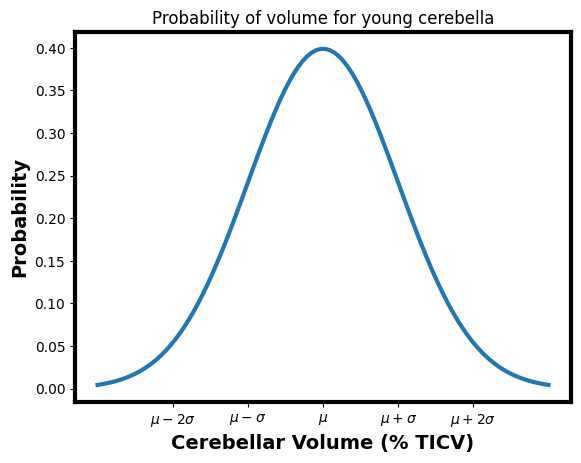

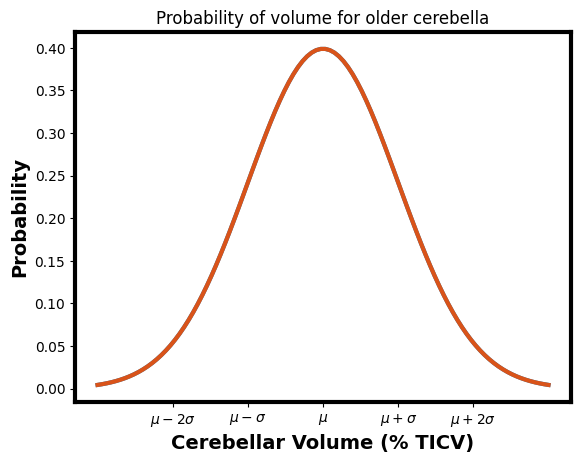

In [149]:

def plot_cerebellar_volume(norm_vols, title):
    sns.lineplot(x=norm_vols, y=norm.pdf(norm_vols, 0, 1))
    plt.xlabel('Cerebellar Volume (% TICV)')
    plt.ylabel('Probability')
    plt.title(title)
    plt.xticks(np.arange(-2, 3), (r'$\mu-2\sigma$', r'$\mu-\sigma$', r'$\mu$', r'$\mu+\sigma$', r'$\mu+2\sigma$'))
    return plt.gca()

# Define normal volume range and plot for young cerebella
norm_vols = np.linspace(-3, 3, 100)
young_pop_handle = plot_cerebellar_volume(norm_vols, 'Probability of volume for young cerebella')

# Define normal volume range and plot for older cerebella
plt.figure()
old_pop_handle = plot_cerebellar_volume(norm_vols, 'Probability of volume for older cerebella')
for lh in young_pop_handle.lines:
    old_pop_handle.plot(lh.get_xdata(), lh.get_ydata(), color=[0.85, 0.325, 0.098])


## Two group model with parameters estimated

In [150]:
young_mean = np.mean(young_cbl_vol)
young_var = np.var(young_cbl_vol)
old_mean = np.mean(old_cbl_vol)
old_var = np.var(old_cbl_vol)

young_population = norm(young_mean, np.sqrt(young_var))
old_population = norm(old_mean, np.sqrt(old_var))

print(f'Mean of young {young_mean:.3f}')
print(f'Mean of old {old_mean:.3f}')

Mean of young 0.119
Mean of old 0.114


Text(0.5, 1.0, 'Estimated Young and Old Populations')

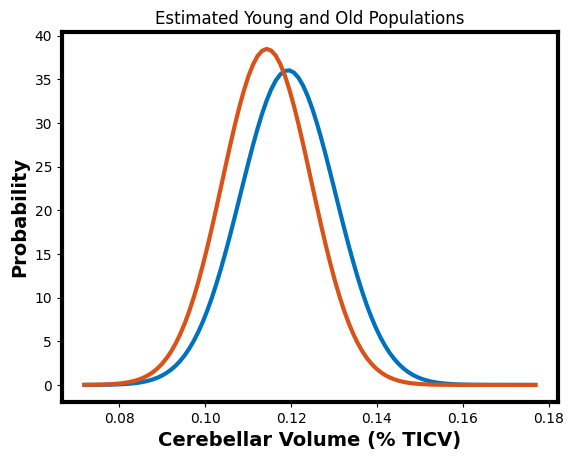

In [151]:
plt.figure()
plt.plot(cbl_vol_plot_x, young_population.pdf(cbl_vol_plot_x), color=[0, 0.447, 0.741])
plt.plot(cbl_vol_plot_x, old_population.pdf(cbl_vol_plot_x), color=[0.85, 0.325, 0.098])
plt.xlabel('Cerebellar Volume (% TICV)')
plt.ylabel('Probability')
plt.title('Estimated Young and Old Populations')


## Sample estimated population

In [152]:
num_samples = 5000
n_young = len(young_cbl_vol)
n_old = len(old_cbl_vol)

young_boot = young_population.rvs((n_young, num_samples))
old_boot = old_population.rvs((n_old, num_samples))


## Draw first three bootstrap samples

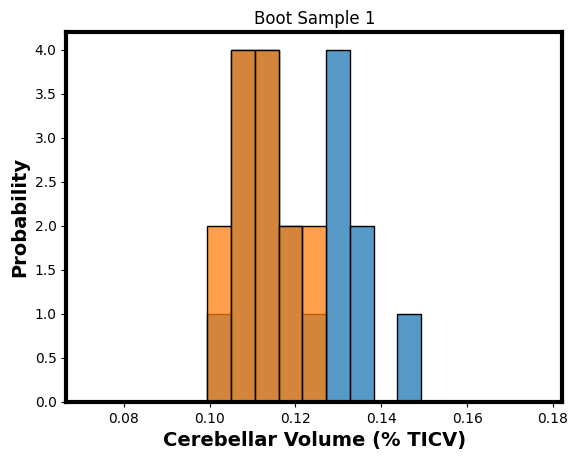

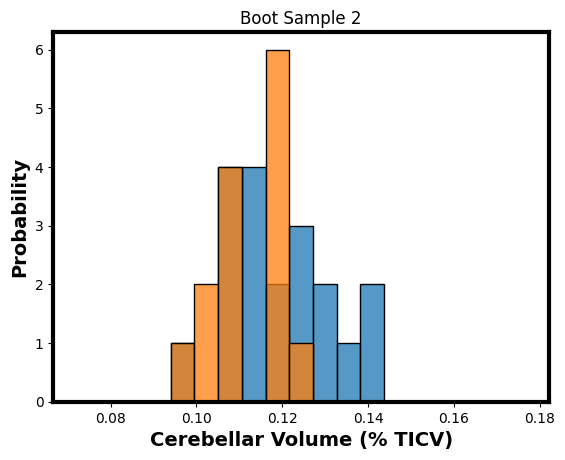

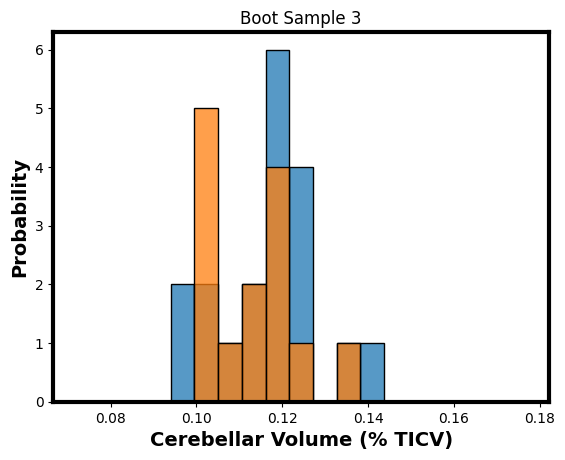

In [153]:
num_sample_plots = 3
for sample_plot_num in range(num_sample_plots):
    fig, ax = plt.subplots()
    sns.histplot(young_boot[:, sample_plot_num], bins=cbl_vol_bin_x, color='C0', ax=ax)
    sns.histplot(old_boot[:, sample_plot_num], bins=cbl_vol_bin_x, color='C1', ax=ax)
    ax.set_xlabel('Cerebellar Volume (% TICV)')
    ax.set_ylabel('Probability')
    ax.set_title(f'Boot Sample {sample_plot_num + 1}')

## Plot distribution of difference of means

Text(0.5, 1.0, 'Parametric bootstrap of difference')

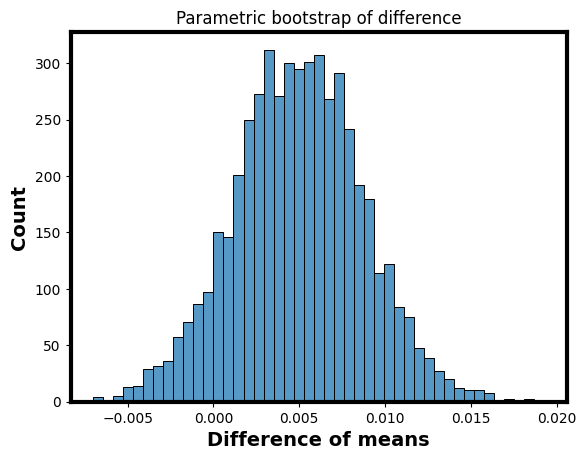

In [154]:
diff_boot = np.mean(young_boot, axis=0) - np.mean(old_boot, axis=0)

sns.histplot(data=diff_boot)
plt.xlabel('Difference of means')
plt.ylabel('Count')
plt.title('Parametric bootstrap of difference')


## Standard deviation of the means and the difference of means 

In [155]:
std_diff_boot = np.std(diff_boot)
std_xbar_young = np.std(np.mean(young_boot, axis=0))
std_xbar_old = np.std(np.mean(old_boot, axis=0))
std_sum = np.sqrt(std_xbar_old ** 2 + std_xbar_young ** 2)

print(f'Std of difference of means {std_diff_boot:.4f}')
print(f'Std of mean young {std_xbar_young:.4f}')
print(f'Std of mean old {std_xbar_old:.4f}')
print(f'Sum of squares for young and old {std_sum:.4f}')

Std of difference of means 0.0037
Std of mean young 0.0025
Std of mean old 0.0028
Sum of squares for young and old 0.0037


## Cohen's $\delta$ population model

Text(-1.0, 0.24397072451914337, '$\\sigma$')

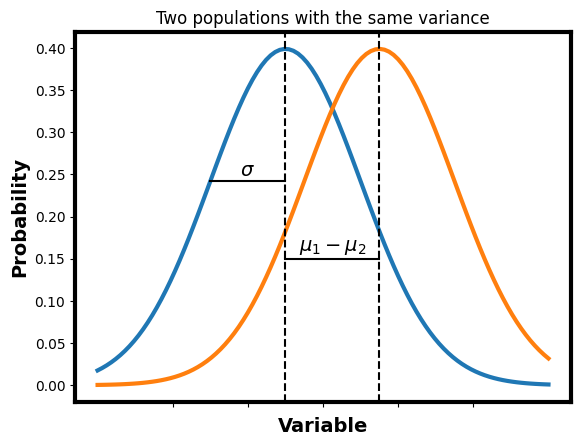

In [156]:
fig, ax = plt.subplots()

norm_vols = np.linspace(-3, 3, 100)
mu1 = -0.5
mu2 = 0.75
s = 1

ax.plot(norm_vols, norm.pdf(norm_vols, mu1, s))
ax.plot(norm_vols, norm.pdf(norm_vols, mu2, s))
ax.set_xlabel('Variable')
ax.set_ylabel('Probability')
ax.set_title('Two populations with the same variance')
ax.set_xticks((-2, -1, 0, 1, 2))
ax.set_xticklabels(['', '', '', '', ''])

ax.axvline(x=mu1, color='k', linestyle='--', linewidth=1.5)
ax.axvline(x=mu2, color='k', linestyle='--', linewidth=1.5)

y_mu = 0.15
ax.plot([mu1, mu2], [y_mu, y_mu], color='k', linewidth=1.5)
ax.text((mu1+mu2)/2, y_mu+0.002, r'$\mu_1 - \mu_2$', horizontalalignment='center', verticalalignment='bottom', fontsize=14, fontweight='bold')

y_s = norm.pdf(mu1-s, mu1, s)
ax.plot([mu1-s, mu1], [y_s, y_s], color='k', linewidth=1.5)
ax.text(mu1-s/2, y_s+0.002, r'$\sigma$', horizontalalignment='center', verticalalignment='bottom', fontsize=14, fontweight='bold')

# Plot of effect size as a probability of choosing right

One way to understand effect sizes is as the probability of choosing two people whose difference is in the same direction as the effect. 

Text(1.4, 0.5, 'Large')

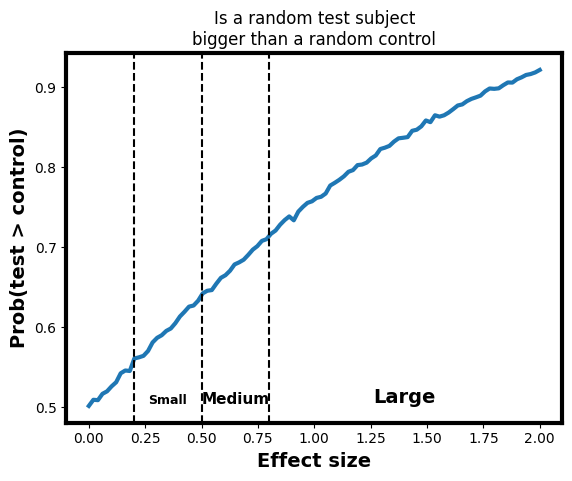

In [157]:
numEffectSizes = 100
allEffectSizes = np.linspace(0, 2, 100)

percentBigger = np.zeros(numEffectSizes)
numSamples = 50000
for effectSizeNum in range(numEffectSizes):
    effectSize = allEffectSizes[effectSizeNum]
    
    a = np.random.normal(0, 1, numSamples)
    b = np.random.normal(effectSize, 1, numSamples)
    
    percentBigger[effectSizeNum] = np.sum(b > a) / numSamples

fig, ax = plt.subplots()
ax.plot(allEffectSizes, percentBigger, '-')
ax.set_xlabel('Effect size')
ax.set_ylabel('Prob(test > control)')
ax.set_title('Is a random test subject\nbigger than a random control')

ax.axvline(x=0.2, color='k', linestyle='--', linewidth=1.5)
ax.axvline(x=0.5, color='k', linestyle='--', linewidth=1.5)
ax.axvline(x=0.8, color='k', linestyle='--', linewidth=1.5)

ax.text(0.35, 0.5, 'Small',
    horizontalalignment='center', verticalalignment='bottom',
    fontsize=9, fontweight='bold')
ax.text(0.65, 0.5, 'Medium',
    horizontalalignment='center', verticalalignment='bottom',
    fontsize=11, fontweight='bold')
ax.text(1.4, 0.5, 'Large',
    horizontalalignment='center', verticalalignment='bottom',
    fontsize=14, fontweight='bold')


## Compare effect size with std of estimate

In [158]:
sampleSizes = [3, 6, 10, 15, 25, 50, 75, 150]
numSizes = len(sampleSizes)
allEffectSizes = []
allStdDiff = []

for N in sampleSizes:
    bootYoung = young_population.rvs(size=(N, numSamples))
    bootOld = old_population.rvs(size=(N, numSamples))

    bootMeanYoung = np.mean(bootYoung, axis=0)
    bootStdYoung = np.std(bootYoung, axis=0)
    bootMeanOld = np.mean(bootOld, axis=0)
    bootStdOld = np.std(bootOld, axis=0)

    bootPopStd = np.sqrt((bootStdYoung ** 2 + bootStdOld ** 2) / 2)
    effectSizes = (bootMeanYoung - bootMeanOld) / bootPopStd
    allEffectSizes.append(np.mean(effectSizes))

    diffMeans = bootMeanYoung - bootMeanOld
    allStdDiff.append(np.std(diffMeans))

allEffectSizes = np.array(allEffectSizes)
allStdDiff = np.array(allStdDiff)

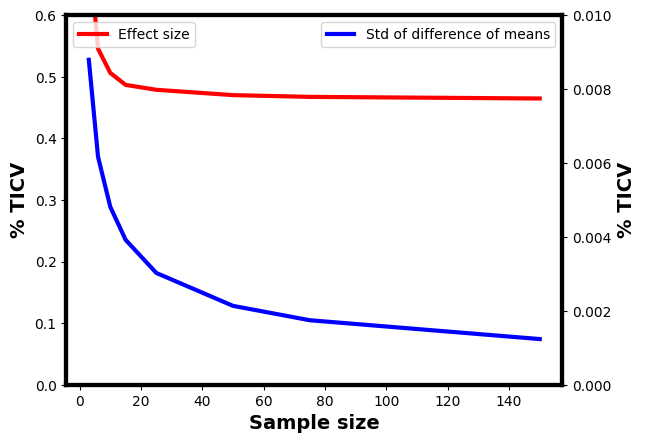

In [159]:
# Create figure
fig, ax1 = plt.subplots()

# Left y-axis
sns.lineplot(x=sampleSizes, y=allEffectSizes.T, ax=ax1, color='r', label='Effect size')
ax1.set_ylabel('% TICV')
ax1.set_ylim([0, 0.6])
ax1.set_xlabel('Sample size')

# Right y-axis
ax2 = ax1.twinx()
sns.lineplot(x=sampleSizes, y=allStdDiff.T, ax=ax2, color='b', label='Std of difference of means')
ax2.set_ylabel('% TICV')
ax2.set_ylim([0, 0.01])

# Legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

## Calculate effect size for difference of young and old cerebellar


In [160]:
# Calculate combined standard deviation
combined_sd = np.sqrt(((n_young - 1) * np.var(young_cbl_vol) + (n_old - 1) * np.var(old_cbl_vol)) / (n_young + n_old - 2))

# Calculate Cohen's d
cohens_d = (np.mean(young_cbl_vol) - np.mean(old_cbl_vol)) / combined_sd

# Display result
print(f"Cohen's d for cerebellar volumes is {cohens_d}")

Cohen's d for cerebellar volumes is 0.45902052847677804


## Show the null model

Text(0.5, 1.0, 'Estimated null populations')

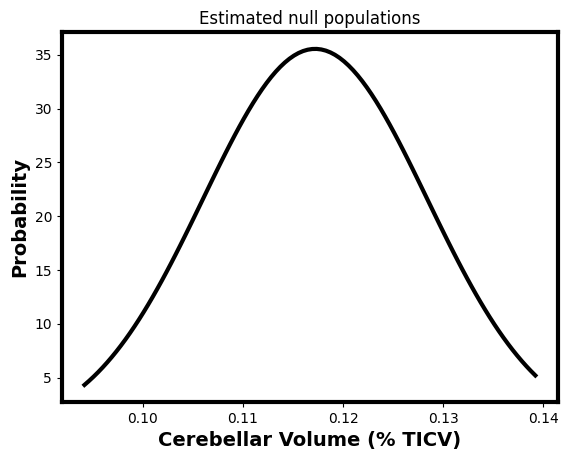

In [161]:
cbl_vol = pd.concat([young_cbl_vol, old_cbl_vol])
x_bar_null = cbl_vol.mean()
s2_null = cbl_vol.var()

null_population = norm(loc=x_bar_null, scale=s2_null ** 0.5)

cbl_vol_plot_x = pd.Series(np.linspace(cbl_vol.min(), cbl_vol.max(), 100))

sns.lineplot(x=cbl_vol_plot_x, y=null_population.pdf(cbl_vol_plot_x), color='k')
plt.xlabel('Cerebellar Volume (% TICV)')
plt.ylabel('Probability')
plt.title('Estimated null populations')


## Reasonable and unreasonable models illustration

### Reasonable model

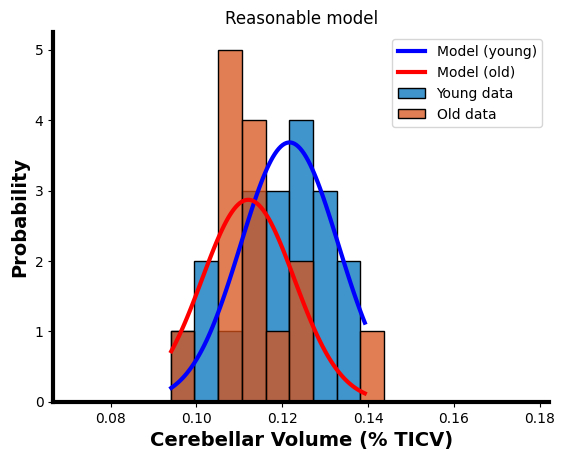

In [162]:
x_bar_young = young_cbl_vol.mean()
s2_young = young_cbl_vol.var()
n_young = len(young_cbl_vol)

x_bar_old = old_cbl_vol.mean()
s2_old = old_cbl_vol.var()
n_old = len(old_cbl_vol)

mu_young = x_bar_young*1.02
mu_old = x_bar_old*0.98

young_population = norm(loc=mu_young, scale=s2_young**0.5)
old_population = norm(loc=x_bar_old*0.98, scale=s2_old**0.5)

fig, ax = plt.subplots()
h_y = sns.histplot(young_cbl_vol, bins=cbl_vol_bin_x, ax=ax, color=[0, 0.447, 0.741], label='Young data')
h_o = sns.histplot(old_cbl_vol, bins=cbl_vol_bin_x, ax=ax, color=[0.85, 0.325, 0.098], label='Old data')

bin_width = cbl_vol_bin_x[1] - cbl_vol_bin_x[0]
pdf_y = young_population.pdf(cbl_vol_plot_x) * n_young * bin_width
pdf_o = old_population.pdf(cbl_vol_plot_x) * n_old * bin_width

ax.plot(cbl_vol_plot_x, pdf_y, color='blue', label='Model (young)')
ax.plot(cbl_vol_plot_x, pdf_o, color='red', label='Model (old)')

ax.legend(['Model (young)', 'Model (old)', 'Young data', 'Old data'])
ax.set(xlabel='Cerebellar Volume (% TICV)', ylabel='Probability', title='Reasonable model')
sns.despine()

### Unreasonable model

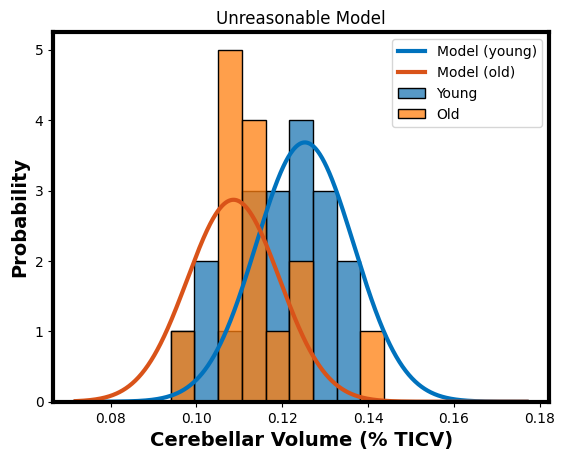

In [163]:
mu_extreme_young = x_bar_young*1.05
mu_extreme_old = x_bar_old*0.95

young_extreme_population = norm(mu_extreme_young, np.sqrt(s2_young))
old_extreme_population = norm(mu_extreme_old, np.sqrt(s2_old))

cbl_vol_plot_x = np.linspace(min(cbl_vol_bin_x), max(cbl_vol_bin_x), 1000)

fig, ax = plt.subplots()
sns.histplot(young_cbl_vol, bins=cbl_vol_bin_x, ax=ax, label='Young')
sns.histplot(old_cbl_vol, bins=cbl_vol_bin_x, ax=ax, label='Old')
sns.lineplot(x=cbl_vol_plot_x, y=young_extreme_population.pdf(cbl_vol_plot_x)*n_young*bin_width, color=[0, 0.447, 0.741], label='Model (young)')
sns.lineplot(x=cbl_vol_plot_x, y=old_extreme_population.pdf(cbl_vol_plot_x)*n_old*bin_width, color=[0.85, 0.325, 0.098], label='Model (old)')
ax.set_xlabel('Cerebellar Volume (% TICV)')
ax.set_ylabel('Probability')
ax.set_title('Unreasonable Model')
ax.legend()

## Generate bootstrap of difference of means for the two models

Results more extreme than ours: 21.94%


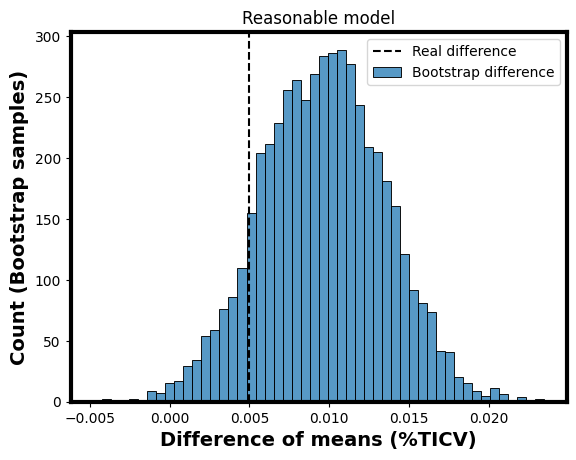

In [164]:
data_mean_diff = young_cbl_vol.mean() - old_cbl_vol.mean()

young_boot = young_population.rvs((num_samples, len(young_cbl_vol))).T
old_boot = old_population.rvs((num_samples, len(old_cbl_vol))).T

boot_mean_diff = pd.DataFrame(young_boot).mean(axis=0) - pd.DataFrame(old_boot).mean(axis=0)
model_diff = young_population.mean() - old_population.mean()

percent_more_extreme = np.sum(np.abs(boot_mean_diff - model_diff) > np.abs(data_mean_diff - model_diff)) / num_samples
print(f"Results more extreme than ours: {percent_more_extreme:.2%}")

fig, ax = plt.subplots()
sns.histplot(boot_mean_diff, bins=50, ax=ax, label='Bootstrap difference')
ax.axvline(data_mean_diff, color='k', linestyle='--', linewidth=1.5, label='Real difference')
ax.set_xlabel('Difference of means (%TICV)')
ax.set_ylabel('Count (Bootstrap samples)')
ax.set_title('Reasonable model')
ax.legend()

### Unreasonable model

Results more extreme than ours: 0.12%


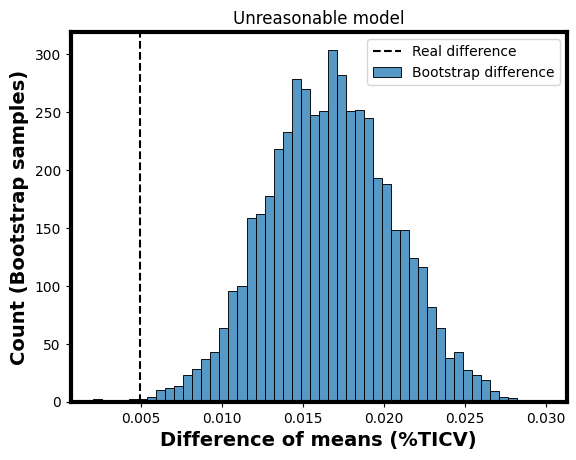

In [166]:
young_extreme_boot = young_extreme_population.rvs((num_samples, len(young_cbl_vol))).T
old_extreme_boot = old_extreme_population.rvs((num_samples, len(old_cbl_vol))).T

boot_mean_diff = pd.DataFrame(young_extreme_boot).mean(axis=0) - pd.DataFrame(old_extreme_boot).mean(axis=0)
model_diff = young_extreme_population.mean() - old_extreme_population.mean()

percent_more_extreme = np.sum(np.abs(boot_mean_diff - model_diff) > np.abs(data_mean_diff - model_diff)) / num_samples
print(f"Results more extreme than ours: {percent_more_extreme:.2%}")

fig, ax = plt.subplots()
sns.histplot(boot_mean_diff, bins=50, ax=ax, label='Bootstrap difference')
ax.axvline(data_mean_diff, color='k', linestyle='--', linewidth=1.5, label='Real difference')
ax.set_xlabel('Difference of means (%TICV)')
ax.set_ylabel('Count (Bootstrap samples)')
ax.set_title('Unreasonable model')
ax.legend()

## Caculate results for a range of possible models

In [169]:
num_model = 100
all_model_diff = np.linspace(-0.03, 0.03, num_model)
grand_mean = x_bar_null

percent_more_extreme = np.zeros(num_model)
for model_num in range(num_model):
    this_diff = all_model_diff[model_num]
    mu_model_young = grand_mean + this_diff/2
    mu_model_old = grand_mean - this_diff/2
    
    young_model_population = norm(mu_model_young, np.sqrt(s2_young))
    old_model_population = norm(mu_model_old, np.sqrt(s2_old))
    
    young_model_boot = young_model_population.rvs((num_samples, n_young))
    old_model_boot = old_model_population.rvs((num_samples, n_old))
    boot_model_mean_diff = pd.DataFrame(young_model_boot).mean(axis=1) - pd.DataFrame(old_model_boot).mean(axis=1)

    percent_more_extreme[model_num] = 100 * (np.abs(boot_model_mean_diff - this_diff) > np.abs(data_mean_diff - this_diff)).sum() / num_samples    


Text(0.5, 1.0, 'How often is bootstrap difference more extreme?')

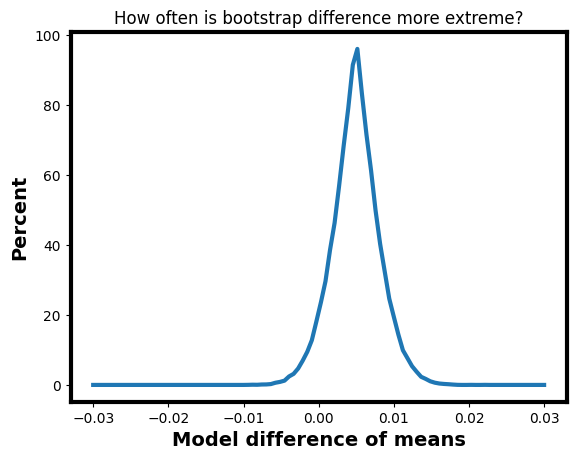

In [170]:
plt.plot(all_model_diff, percent_more_extreme)
plt.xlabel('Model difference of means')
plt.ylabel('Percent')
plt.title('How often is bootstrap difference more extreme?')

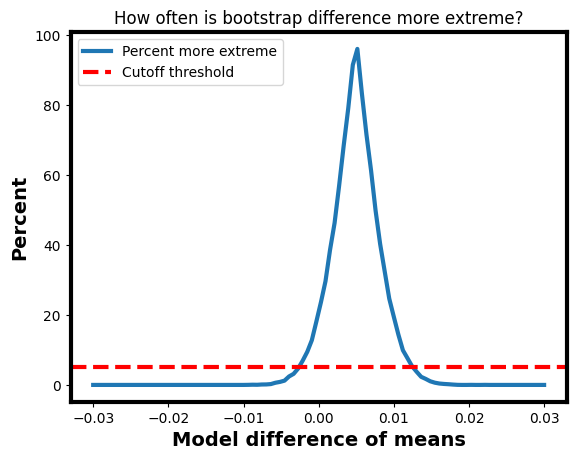

In [174]:
plt.plot(all_model_diff, percent_more_extreme, label='Percent more extreme')
plt.xlabel('Model difference of means')
plt.ylabel('Percent')
plt.title('How often is bootstrap difference more extreme?')

# plot the cutoff threshold line
l_cutoff = plt.axhline(y=5, linestyle='--', color='r', label='Cutoff threshold')

# add legend and display the confidence interval
plt.legend()


The confidence interval is -0.002 - 0.012


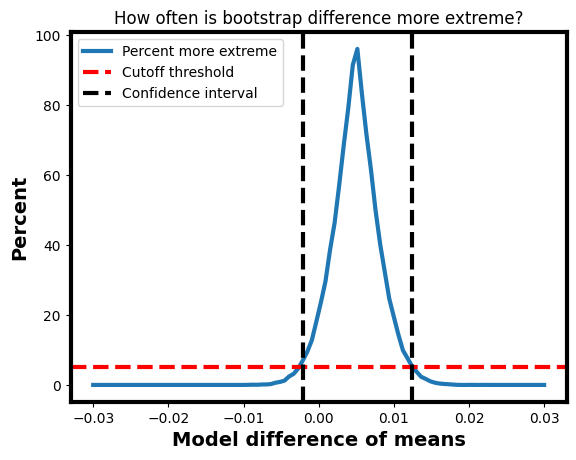

In [173]:
plt.plot(all_model_diff, percent_more_extreme, label='Percent more extreme')
plt.xlabel('Model difference of means')
plt.ylabel('Percent')
plt.title('How often is bootstrap difference more extreme?')

# plot the cutoff threshold line
l_cutoff = plt.axhline(y=5, linestyle='--', color='r', label='Cutoff threshold')

# find the confidence interval bounds and plot them
min_conf_interval = all_model_diff[percent_more_extreme >= 5][0]
max_conf_interval = all_model_diff[percent_more_extreme >= 5][-1]
plt.axvline(x=min_conf_interval, linestyle='--', color='k', label='Confidence interval')
plt.axvline(x=max_conf_interval, linestyle='--', color='k')

# add legend and display the confidence interval
plt.legend()
print(f'The confidence interval is {min_conf_interval:.3f} - {max_conf_interval:.3f}')

## Bootstrap confidence interval

In [176]:
young_boot = young_cbl_vol.sample(n=len(young_cbl_vol)*num_samples, replace=True).reset_index(drop=True).to_numpy().reshape(num_samples, len(young_cbl_vol))
old_boot = old_cbl_vol.sample(n=len(old_cbl_vol)*num_samples, replace=True).reset_index(drop=True).to_numpy().reshape(num_samples, len(old_cbl_vol))

# Calculate the bootstrap distribution of the difference in means
boot_mean_diff = np.mean(young_boot, axis=1) - np.mean(old_boot, axis=1)

# Calculate the confidence interval
boot_conf_int = np.percentile(boot_mean_diff, [2.5, 97.5])

print(f"The confidence interval is {boot_conf_int[0]:.3f}-{boot_conf_int[1]:.3f}")





The confidence interval is -0.003-0.012


### Now code to show this in a figure

Text(0.5, 1.0, 'Bootstrap of difference')

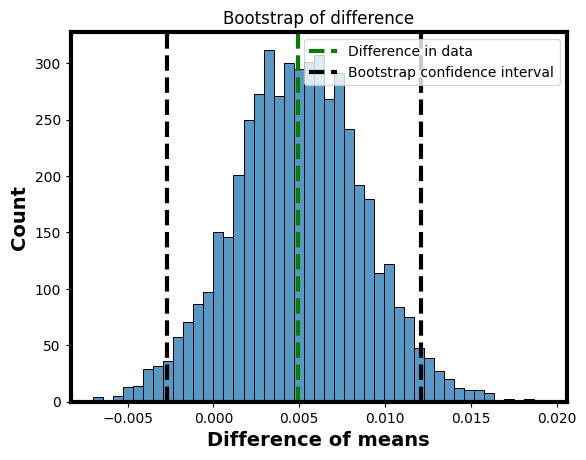

In [179]:
fig, ax = plt.subplots()
sns.histplot(diff_boot)
ax.axvline(x=data_mean_diff, linestyle='--', color='g', label='Difference in data')
ax.axvline(x=boot_conf_int[0], linestyle='--', color='k', label='Bootstrap confidence interval')
ax.axvline(x=boot_conf_int[1], linestyle='--', color='k')
ax.legend(loc='best')

ax.set_xlabel('Difference of means')
ax.set_ylabel('Count')
ax.set_title('Bootstrap of difference')

### Add null model to graph

In [182]:
null_more_extreme = np.sum(np.abs(diff_boot - data_mean_diff) - np.abs(data_mean_diff) > 0) / num_samples
print(f"Significance (according to confidence interval): {null_more_extreme:.3f}")

Significance (according to confidence interval): 0.182


Text(0.5, 1.0, 'Bootstrap of difference')

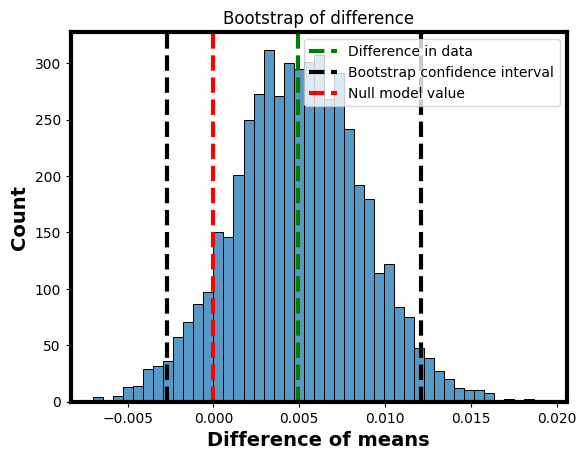

In [180]:
fig, ax = plt.subplots()
sns.histplot(diff_boot)
ax.axvline(x=data_mean_diff, linestyle='--', color='g', label='Difference in data')
ax.axvline(x=boot_conf_int[0], linestyle='--', color='k', label='Bootstrap confidence interval')
ax.axvline(x=boot_conf_int[1], linestyle='--', color='k')
ax.axvline(x=0, linestyle='--', color='r', label='Null model value')
ax.legend(loc='best')

ax.set_xlabel('Difference of means')
ax.set_ylabel('Count')
ax.set_title('Bootstrap of difference')